In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('D:/SEMESTER 7/PD/PROYEK')

In [2]:
data_test = pd.read_csv('Test.csv')
data_train = pd.read_csv('Train.csv')

In [3]:
data_train.shape

#jumlah row = 8523
#jumlah atribut/variable/field = 12

(8523, 12)

In [4]:
data_test.shape

(5681, 11)

In [5]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Cleaning

In [9]:
missing_value_train = pd.DataFrame(data_train.isnull().sum())
missing_value_test = pd.DataFrame(data_test.isnull().sum())

In [10]:
missing_value_train = missing_value_train.reset_index()
missing_value_test = missing_value_test.reset_index()

In [11]:
missing_value_train = missing_value_train.rename(columns ={'index':'Variables', 0:'Missing percentage'})
missing_value_train['Missing percentage'] = (missing_value_train['Missing percentage']/len(data_train))*100

In [12]:
missing_value_train

,Variables,Missing percentage
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


In [13]:
missing_value_test = missing_value_test.rename(columns ={'index':'Variables', 0:'Missing percentage'})
missing_value_test['Missing percentage'] = (missing_value_test['Missing percentage']/len(data_test))*100

In [14]:
missing_value_test

,Variables,Missing percentage
0,Item_Identifier,0.000000
1,Item_Weight,17.180074
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.269671
9,Outlet_Location_Type,0.000000


In [15]:
data_train.Item_Weight.unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [16]:
data_test.Item_Weight.unique()

array([20.75 ,  8.3  , 14.6  ,  7.315,    nan,  9.8  , 19.35 ,  6.305,
        5.985, 16.6  ,  6.59 ,  4.785, 16.75 ,  6.135, 19.85 , 17.85 ,
       13.6  ,  7.1  , 19.2  , 13.65 ,  6.785, 13.   ,  5.825, 13.8  ,
       12.8  ,  9.5  , 12.5  ,  5.78 , 10.395, 18.35 , 21.1  , 19.75 ,
        8.43 , 15.35 ,  6.71 , 10.195, 11.65 , 12.85 , 12.15 , 18.25 ,
        5.98 , 12.65 , 13.1  , 20.7  ,  7.855, 13.35 , 17.25 ,  8.315,
       21.35 ,  5.88 ,  7.435, 14.65 , 14.   , 18.2  , 17.6  ,  7.71 ,
        7.81 , 16.35 , 16.1  ,  5.34 ,  5.51 ,  6.61 ,  6.38 ,  8.71 ,
       17.75 ,  6.44 , 12.6  ,  7.935, 18.5  ,  6.035, 11.8  ,  6.26 ,
       16.5  , 15.7  ,  6.635,  8.155,  6.175,  8.18 ,  8.355,  6.905,
       20.35 , 19.25 ,  5.48 ,  5.425, 12.1  , 11.   ,  5.765,  5.44 ,
        6.13 ,  8.195, 14.15 , 14.3  ,  5.635,  5.73 ,  7.155, 15.2  ,
       15.25 ,  8.76 ,  9.13 , 19.6  , 10.   , 11.3  ,  6.57 , 13.15 ,
        4.635, 10.6  ,  9.3  ,  7.02 ,  7.825, 19.1  ,  7.51 ,  8.85 ,
      

In [17]:
data_train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
data_test.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [19]:
data_train.Item_Weight.mode()

0    12.15
dtype: float64

In [20]:
data_test.Item_Weight.mode()

0    10.5
dtype: float64

In [21]:
data_train.Outlet_Size.mode()

0    Medium
dtype: object

In [22]:
data_test.Outlet_Size.mode()

0    Medium
dtype: object

In [23]:
#mengisi semua nilai NaN dengan Mode

data_train['Item_Weight'].fillna(data_train['Item_Weight'].mode()[0], inplace=True)
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mode()[0], inplace=True)
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0], inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace=True)

In [24]:
data_train.Item_Weight.isnull().sum()

0

In [25]:
data_test.Item_Weight.isnull().sum()

0

In [26]:
data_train.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [27]:
data_test.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

### Uniformity --> menyeragamkan isi data

In [28]:
data_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
data_test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [30]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].astype(str).str.lower()
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].astype(str).str.lower()

In [31]:
data_train['Item_Fat_Content'].unique()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

In [32]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace(['reg'], 'regular')
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace(['lf', 'low fat'], 'low fat')

In [33]:
data_train['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [34]:
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].replace(['reg'], 'regular')
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].replace(['lf', 'low fat'], 'low fat')

In [35]:
data_test['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

### Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
data_train['Outlet_Size'] = label_encoder.fit_transform(data_train['Outlet_Size'])
data_train['Item_Fat_Content'] = label_encoder.fit_transform(data_train['Item_Fat_Content'])

In [38]:
data_test['Outlet_Size'] = label_encoder.fit_transform(data_test['Outlet_Size'])
data_test['Item_Fat_Content'] = label_encoder.fit_transform(data_test['Item_Fat_Content'])

In [39]:
data_train.Outlet_Size.unique()

array([1, 0, 2], dtype=int64)

In [40]:
data_train.Item_Fat_Content.unique()

array([0, 1], dtype=int64)

In [41]:
data_test.Outlet_Size.unique()

array([1, 2, 0], dtype=int64)

In [42]:
data_test.Item_Fat_Content.unique()

array([0, 1], dtype=int64)

### Categorical Value

In [43]:
mapping_dict_1={
    'Outlet_Type':{
        'Supermarket Type3':3,
        'Supermarket Type2':2,
        'Supermarket Type1':1,
       'Grocery Store':4,
        
    }
}
data_train.replace(mapping_dict_1, inplace=True)

In [44]:
mapping_dict_1={
    'Outlet_Type':{
        'Supermarket Type3':3,
        'Supermarket Type2':2,
        'Supermarket Type1':1,
       'Grocery Store':4,
        
    }
}
data_test.replace(mapping_dict_1, inplace=True)

In [45]:
data_train['Item_Identifier'].duplicated().sum()

6964

In [46]:
data_test['Item_Identifier'].duplicated().sum()

4138

In [47]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [48]:
data_train.drop_duplicates("Item_Identifier", keep='last', inplace=True)

In [49]:
data_test.drop_duplicates("Item_Identifier", keep='last', inplace=True)

In [50]:
data_train.Item_Identifier.unique()

array(['FDN52', 'FDO33', 'FDY43', ..., 'NCJ29', 'FDN46', 'DRG01'],
      dtype=object)

In [51]:
data_train.Outlet_Identifier.unique()

array(['OUT027', 'OUT018', 'OUT049', 'OUT035', 'OUT017', 'OUT046',
       'OUT019', 'OUT045', 'OUT013', 'OUT010'], dtype=object)

In [52]:
data_train['Item_Identifier'].duplicated().sum()

0

In [53]:
data_test['Item_Identifier'].duplicated().sum()

0

# Integration

In [54]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [55]:
data_train.Outlet_Establishment_Year.value_counts()

1985    286
1999    198
1997    178
2007    171
2009    168
1987    158
2004    157
2002    152
1998     91
Name: Outlet_Establishment_Year, dtype: int64

In [56]:
correlations = data_train.corr(method='kendall')

In [57]:
correlations

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.025888,-0.006421,0.017436,0.016226,-0.010952,-0.036981,0.017945
Item_Fat_Content,-0.025888,1.000000,0.029073,-0.004356,-0.006619,-0.006874,-0.012634,-0.007578
Item_Visibility,-0.006421,0.029073,1.000000,0.003028,-0.035749,0.029213,0.109495,-0.070545
Item_MRP,0.017436,-0.004356,0.003028,1.000000,-0.015502,0.015787,0.050909,0.393833
Outlet_Establishment_Year,0.016226,-0.006619,-0.035749,-0.015502,1.000000,-0.018463,-0.236985,0.032798
Outlet_Size,-0.010952,-0.006874,0.029213,0.015787,-0.018463,1.000000,0.049754,-0.106345
Outlet_Type,-0.036981,-0.012634,0.109495,0.050909,-0.236985,0.049754,1.000000,-0.191111
Item_Outlet_Sales,0.017945,-0.007578,-0.070545,0.393833,0.032798,-0.106345,-0.191111,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

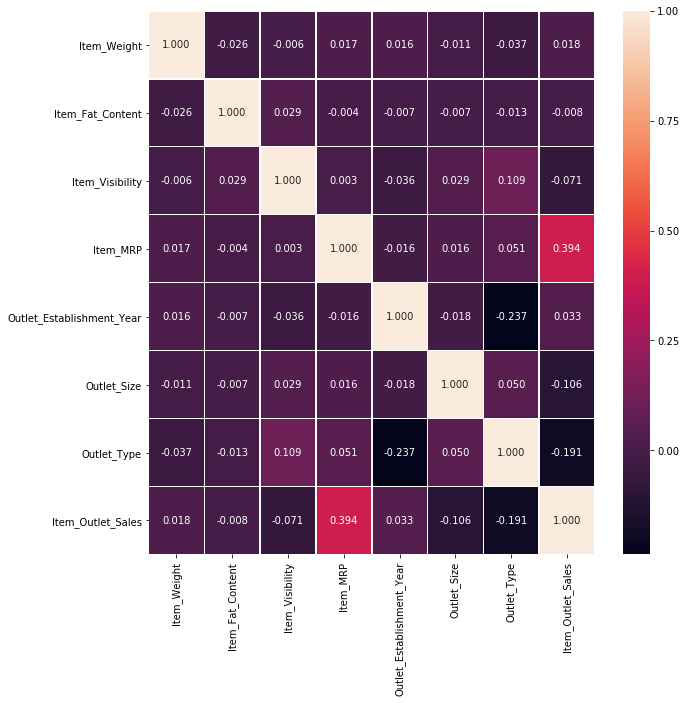

In [58]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.savefig('correlation_bigmarket_sales_1.png')
plt.show

# Reduction

In [59]:
to_drop = ['Item_Identifier']
data_train.drop(to_drop, inplace = True, axis=1)

In [60]:
data_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [61]:
data_train['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 1', 'Tier 2'], dtype=object)

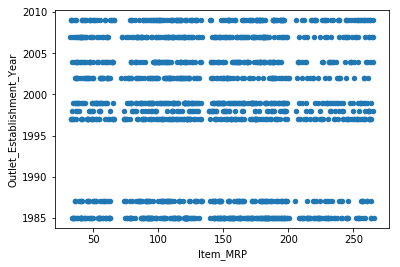

In [62]:
data_train.plot.scatter(x='Item_MRP', y='Outlet_Establishment_Year');

### Agregation

In [63]:
avg_Outlet_Establishment_Year = data_train.groupby('Outlet_Establishment_Year').Item_MRP.mean()

In [64]:
print(avg_Outlet_Establishment_Year)

Outlet_Establishment_Year
1985    144.648819
1987    139.362611
1997    144.489967
1998    148.333345
1999    140.053902
2002    127.918280
2004    138.506581
2007    135.992039
2009    149.205490
Name: Item_MRP, dtype: float64


In [65]:
def my_zscore(x):
    return((x-x.mean())/x.std())

In [66]:
transform_z = data_train.groupby('Outlet_Establishment_Year').Item_MRP.transform(my_zscore)

In [67]:
print(data_train.shape)

(1559, 11)


In [68]:
print(transform_z.shape)

(1559,)


In [69]:
from scipy.stats import zscore
sp_z_grouped = data_train.groupby('Outlet_Establishment_Year').Item_MRP.transform(zscore)
sp_z_nogroup = zscore(data_train.Item_MRP)

In [70]:
print(transform_z.head())

927    -0.943991
1155   -0.517057
1271    0.313742
1349    1.481260
1567    1.122022
Name: Item_MRP, dtype: float64


In [71]:
print(sp_z_grouped.head())

927    -0.945646
1155   -0.518603
1271    0.314680
1349    1.485015
1567    1.125612
Name: Item_MRP, dtype: float64


In [72]:
data_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [73]:
mapping_dict_1={
    'Outlet_Location_Type':{
        'Tier 3':3,
        'Tier 2':2,
        'Tier 1':1,
        
    }
}
data_train.replace(mapping_dict_1, inplace=True)

In [74]:
mapping_dict_1={
    'Outlet_Location_Type':{
        'Tier 3':3,
        'Tier 2':2,
        'Tier 1':1,
        
    }
}
data_test.replace(mapping_dict_1, inplace=True)

In [75]:
mapping_dict_1={
    'Outlet_Identifier':{
        'OUT049':10,
        'OUT046':9,
        'OUT045':8,
        'OUT035':7,
        'OUT027':6,
        'OUT019':5,
        'OUT018':4,
        'OUT017':3,
        'OUT013':2,
        'OUT010':1,
        
    }
}
data_train.replace(mapping_dict_1, inplace=True)

In [76]:
mapping_dict_1={
    'Outlet_Identifier':{
        'OUT049':10,
        'OUT046':9,
        'OUT045':8,
        'OUT035':7,
        'OUT027':6,
        'OUT019':5,
        'OUT018':4,
        'OUT017':3,
        'OUT013':2,
        'OUT010':1,
        
    }
}
data_test.replace(mapping_dict_1, inplace=True)

In [77]:
data_test['Item_Type'].unique()

array(['Seafood', 'Snack Foods', 'Canned', 'Baking Goods', 'Dairy',
       'Household', 'Breads', 'Frozen Foods', 'Fruits and Vegetables',
       'Health and Hygiene', 'Others', 'Meat', 'Starchy Foods',
       'Hard Drinks', 'Soft Drinks', 'Breakfast'], dtype=object)

In [78]:
mapping_dict_1={
    'Item_Type':{
        'Hard Drinks':15,
        'Breakfast':14,
        'Canned':13,
        'Dairy':12,
        'Seafood':11,
        'Frozen Foods':10,
        'Snack Foods':9,
        'Fruits and Vegetables':8,
        'Meat':7,
        'Baking Goods':6,
        'Household':5,
        'Breads':4,
        'Health and Hygiene':3,
        'Soft Drinks':2,
        'Starchy Foods':1,
        'Others':0,
        
    }
}
data_train.replace(mapping_dict_1, inplace=True)

In [79]:
mapping_dict_1={
    'Item_Type':{
        'Hard Drinks':15,
        'Breakfast':14,
        'Canned':13,
        'Dairy':12,
        'Seafood':11,
        'Frozen Foods':10,
        'Snack Foods':9,
        'Fruits and Vegetables':8,
        'Meat':7,
        'Baking Goods':6,
        'Household':5,
        'Breads':4,
        'Health and Hygiene':3,
        'Soft Drinks':2,
        'Starchy Foods':1,
        'Others':0,
        
    }
}
data_test.replace(mapping_dict_1, inplace=True)

In [80]:
# Making bins for Coapplicant income variable
bins=[0,5000,10000,15000]
group=['Low','medium','High']
data_train['Item_Outlet_Sales']=pd.cut(data_train['Item_Outlet_Sales'],bins,labels=group)

In [81]:
data_train.Item_Outlet_Sales.max()

'High'

In [82]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [83]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,12.15,1,0.130933,10,86.9198,6,1985,1,3,3,Low
1155,14.75,0,0.089686,9,115.3518,4,2009,1,3,2,Low
1271,14.85,0,0.098803,8,169.7474,4,2009,1,3,2,Low
1349,11.65,0,0.039981,9,227.3694,10,1999,1,1,1,Low
1567,15.70,1,0.008734,7,207.8980,7,2004,2,2,1,Low


In [84]:
mapping_dict_1={
    'Item_Outlet_Sales':{
        'Low':0,
        'medium':1,
        'High':2,
        
    }
}
data_train.replace(mapping_dict_1, inplace=True)

In [85]:
data_train.Item_Outlet_Sales.unique()

array([0, 1, 2], dtype=int64)

In [86]:
data_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales              int64
dtype: object

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [88]:
X = data_train.loc[:, data_train.columns != 'Item_Outlet_Sales']
y = data_train.loc[:, 'Item_Outlet_Sales']
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=123)

In [89]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
pred_cv = model.predict(x_cv)

In [91]:
accuracy_score(y_cv, pred_cv)

0.9230769230769231

In [105]:
from sklearn.metrics import accuracy_score
predictions = [round(value) for value in pred_cv]
# evaluate predictions
accuracy = accuracy_score(y_cv, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.31%


In [108]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cv,pred_cv))
print(classification_report(y_cv,pred_cv))

[[286   4   0]
 [ 19   2   0]
 [  0   1   0]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       290
           1       0.29      0.10      0.14        21
           2       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       312
   macro avg       0.41      0.36      0.37       312
weighted avg       0.89      0.92      0.90       312



C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[286   4   0]
 [ 19   2   0]
 [  0   1   0]]


Text(33.0, 0.5, 'True')

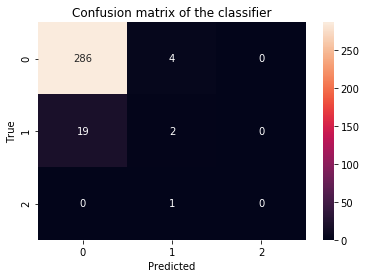

In [107]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, predictions )
print(cm)


# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [93]:
data_test = data_test[X.columns]

In [94]:
data_test['predictions'] = model.predict(data_test)

In [112]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predictions
16,19.85,0,0.054135,11,198.7768,8,2002,1,2,1,0
49,18.25,0,0.075195,9,124.9046,9,1997,2,1,1,0
290,12.85,0,0.121624,9,42.2428,2,1987,0,3,1,0
380,5.34,1,0.005973,9,99.0358,10,1999,1,1,1,0
439,17.20,1,0.012061,13,166.4184,4,2009,1,3,2,0


## SVM

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [97]:
X = data_train.loc[:, data_train.columns != 'Item_Outlet_Sales']
y = data_train.loc[:, 'Item_Outlet_Sales']
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=123)

In [98]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [99]:
y_pred = svclassifier.predict(x_cv)

In [100]:
accuracy_score(y_cv, y_pred)

0.9262820512820513

In [101]:
from sklearn.metrics import accuracy_score
prediction = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_cv, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.63%


In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cv,y_pred))
print(classification_report(y_cv,y_pred))

[[289   1   0]
 [ 21   0   0]
 [  1   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       290
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00         1

   micro avg       0.93      0.93      0.93       312
   macro avg       0.31      0.33      0.32       312
weighted avg       0.86      0.93      0.89       312



C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Angelina Purba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[289   1   0]
 [ 21   0   0]
 [  1   0   0]]


Text(33.0, 0.5, 'True')

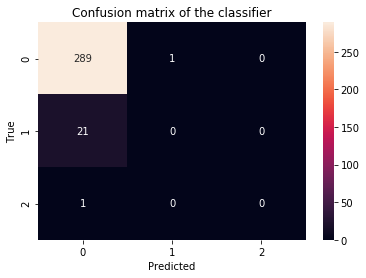

In [104]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, prediction )
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')